In [2]:
import pandas as pd
links = pd.read_csv("../data/links.csv")
links.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
movies = pd.read_csv("../data/movies.csv")
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv("../data/ratings.csv")
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tags = pd.read_csv("../data/tags.csv")
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
#Exploratory Data analysis begins
#Reference: https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
#https://codeburst.io/how-to-rewrite-your-sql-queries-in-pandas-and-more-149d341fc53e
#https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [8]:
tags.sample(5)

,userId,movieId,tag,timestamp
811,424,2160,suspense,1457843308
2325,474,8167,swashbuckler,1138040004
742,424,608,Steve Buscemi,1457900865
83,62,4223,sniper,1528024852
1221,474,929,war,1140441887


In [9]:
ratings.sample(5)

,userId,movieId,rating,timestamp
98973,608,1917,3.5,1117504416
49959,321,480,4.0,843212458
60036,387,7102,3.0,1094940710
54428,357,7361,5.0,1348611054
45085,298,50872,2.5,1447518423


In [10]:
#Joinning the datasets tags and ratings
tagratings = pd.merge(tags, ratings, on=['movieId'])
tagratings.head(5)

,userId_x,movieId,tag,timestamp_x,userId_y,rating,timestamp_y
0,2,60756,funny,1445714994,2,5.0,1445714980
1,2,60756,funny,1445714994,18,3.0,1455749449
2,2,60756,funny,1445714994,62,3.5,1528934376
3,2,60756,funny,1445714994,68,2.5,1269123243
4,2,60756,funny,1445714994,73,4.5,1464196221


In [11]:
funnyrate = tagratings[tagratings.tag == 'funny'].rating
funnyrate.describe()
#funny tag corresponds to average raing of 3.8
#Tags can be analyzed to have an idea of the average rating for that category of movie

count    1092.000000
mean        3.822344
std         1.035809
min         0.500000
25%         3.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [12]:
#identify how many distinct tags are there and what are they
import numpy
numpy.set_printoptions(threshold=numpy.nan)
tagratings.tag.str.lower().unique()

array(['funny', 'highly quotable', 'will ferrell', 'comedy',
       'boxing story', 'mma', 'tom hardy', 'drugs', 'leonardo dicaprio',
       'martin scorsese', 'stock market', 'wall street', 'way too long',
       'suspense', 'twist ending', 'undercover cop', 'atmospheric',
       'jack nicholson', 'al pacino', 'gangster', 'mafia', 'holocaust',
       'true story', 'anthony hopkins', 'courtroom drama', 'britpop',
       'indie record label', 'music', 'dumpster diving', 'sustainability',
       'romantic comedy', 'wedding', 'weddings', 'painter', 'bloody',
       'bromance', 'james franco', 'seth rogen', 'black hole', 'sci-fi',
       'time-travel', 'christopher nolan', 'bad dialogue',
       'philosophical issues', 'thought-provoking', 'visually appealing',
       'fantasy', 'magic board game', 'robin williams', 'game',
       'beautiful scenery', 'epic', 'historical', 'inspirational',
       'medieval', 'mel gibson', 'oscar (best cinematography)', 'revenge',
       'sword fight', 'sco

In [13]:
fiction = tagratings[tagratings.tag == 'sci-fi'].rating
fiction.describe()

count    2527.000000
mean        4.045706
std         0.957834
min         0.500000
25%         3.500000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [14]:
adventure = tagratings[tagratings.tag == 'adventure'].rating
adventure.describe()

count    449.000000
mean       3.904232
std        0.954175
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [15]:
#Start with Feature Engineering
#Encoding the tags categories
tag_label = tagratings['tag'].astype('category').cat.categories.tolist()
tag_category = {'tag' : {k: v for k,v in zip(tag_label,list(range(1,len(tag_label)+1)))}}

print(tag_category)
#1584 categories are there

{'tag': {'"artsy"': 1, '06 Oscar Nominated Best Movie - Animation': 2, '1900s': 3, '1920s': 4, '1950s': 5, '1960s': 6, '1970s': 7, '1980s': 8, '1990s': 9, '2001-like': 10, '2D animation': 11, '70mm': 12, "80's": 13, 'AIDs': 14, 'AS Byatt': 15, 'AWESOME': 16, 'Aardman': 17, 'Academy award (Best Supporting Actress)': 18, 'Action': 19, 'Adam Sandler': 20, 'Adrien Brody': 21, 'Adventure': 22, 'Afghanistan': 23, 'Africa': 24, 'Agatha Christie': 25, 'Al Pacino': 26, 'Alcatraz': 27, 'Alfred Hitchcock': 28, 'Alicia Vikander': 29, 'Amazing Cinematography': 30, 'American Indians': 31, 'American propaganda': 32, 'Amish': 33, 'Amtrak': 34, 'Amy Adams': 35, 'Andrew Lloyd Weber': 36, 'Andy Garcia': 37, 'Andy Kaufman': 38, 'Andy Samberg': 39, 'Angelina Jolie': 40, 'Animal movie': 41, 'Anne Boleyn': 42, 'Anne Hathaway': 43, 'Anthony Hopkins': 44, 'Arnold Schwarzenegger': 45, 'Arthur C. Clarke': 46, 'Arthur Miller': 47, 'Astaire and Rogers': 48, 'Atmospheric': 49, 'Atomic bomb': 50, 'Audrey Tautou': 51

In [16]:
#converting non numeric values to numeric category whenever needed
tagratings.replace(tag_category, inplace=True)
print(tagratings.head())

   userId_x  movieId  tag  timestamp_x  userId_y  rating  timestamp_y
0         2    60756  933   1445714994         2     5.0   1445714980
1         2    60756  933   1445714994        18     3.0   1455749449
2         2    60756  933   1445714994        62     3.5   1528934376
3         2    60756  933   1445714994        68     2.5   1269123243
4         2    60756  933   1445714994        73     4.5   1464196221


In [ ]:
#Feature Selection
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Isolate Data, class labels and column values
X = tagratings.iloc[:,3:6]
Y = tagratings.iloc[:,-1]
names = tagratings.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

#Selecting features "tag" and "rating"

In [17]:
movie_tag = pd.merge(movies, tagratings, on=['movieId'])
movie_tag.head(5)

,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,1240,1139045764,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,1240,1139045764,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,1240,1139045764,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,1240,1139045764,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,1240,1139045764,17,4.5,1305696483


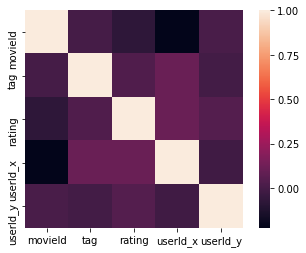

In [19]:
#check correlation between features
import seaborn as sns
temp_set = movie_tag[['movieId','title','tag','genres','rating','userId_x','userId_y']]
cor = temp_set.corr()
sns.heatmap(cor, square = True)

In [ ]:
#The color palette in the side represents the amount of correlation among the variables.
#The lighter shade represents high correlation.
#Observation: tag is most correlated with rating and least correlated with movieID

In [23]:
#K means Clustering 
from sklearn.cluster import KMeans
features = movie_tag[['tag','rating']]
def doKmeans(X, nclust=4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(features, 2)
kmeans = pd.DataFrame(clust_labels)
features.insert((features.shape[1]),'kmeans',kmeans)

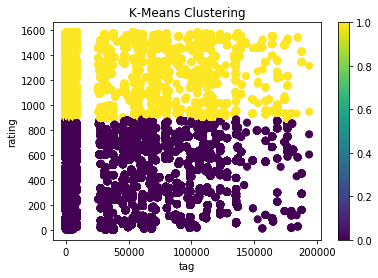

In [24]:
#Plot the clusters obtained using k means
import matplotlib.pyplot as plt     

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(movie_tag['movieId'],features['tag'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('tag')
ax.set_ylabel('rating')
plt.colorbar(scatter)

In [58]:
from sklearn.cluster import KMeans

#cluster based on tags/ratings
X = movie_tag[['tag','rating']]

mod = KMeans(n_clusters=5)
category = mod.fit_predict(X)
category_dataframe = pd.DataFrame({"category":category},index = movie_tag['title'])

In [59]:
#function to find related movies

def test(movie_name,recommend_number):
    if movie_name in list(movie_tag['title']):
        #create cluster for the particular movie
        movie_cluster = category_dataframe.ix[movie_name,'category']
        #retrieve category
        temp_cat = movie_cluster.values[0]
        
        #calculate score
        score = movie_tag.ix[list(category_dataframe['category'] == temp_cat),['rating','title']]
        #sort the scores based on rating
        sort_score = score.sort_values(['rating'],ascending=[0])
        
        #exclude the given movie title from the list
        sort_score = sort_score[sort_score['title'] != movie_name]
        
        recommend_number = min(sort_score.shape[0],recommend_number)
        recommend_movie = list(sort_score.iloc[range(recommend_number),1])
        y = list(set(recommend_movie))
        return y
        #print(y)
    else:
        print("Can't find this movie!")

In [60]:
import warnings  
y = test('Grumpier Old Men (1995)',5) #recommend movie related to the one provided

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [61]:
#recommended movies based on the input movie Grumpier Old Men (1995)
print(y)

['Pulp Fiction (1994)', 'Memento (2000)', 'Donnie Darko (2001)', 'Some Like It Hot (1959)']
